<a href="https://colab.research.google.com/github/roshank1605A04/World-Food-Production/blob/master/World_Food_Production.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
!ls 'drive'


'My Drive'


In [0]:

# reading the data
data = pd.read_csv('drive/My Drive/Projects/World Food Production/World Food Production.csv', encoding = "ISO-8859-1")

# ENODING ISO-8859-1 is a single byte encoding which can represent the first 256 unicode characters
# Both UTF-8 and ISO-8859-1 encode the ASCII Characters the same.

# checking the shape of the data
print(data.shape)

(21477, 63)


In [0]:
data.head()

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,AFG,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AFG,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,AFG,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,AFG,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200


In [0]:
data.tail()

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
21472,ZWE,181,Zimbabwe,2948,Milk - Excluding Butter,5142,Food,1000 tonnes,-19.02,29.15,...,373.0,357.0,359.0,356.0,341.0,385.0,418.0,457.0,426,451
21473,ZWE,181,Zimbabwe,2960,"Fish, Seafood",5521,Feed,1000 tonnes,-19.02,29.15,...,5.0,4.0,9.0,6.0,9.0,5.0,15.0,15.0,15,15
21474,ZWE,181,Zimbabwe,2960,"Fish, Seafood",5142,Food,1000 tonnes,-19.02,29.15,...,18.0,14.0,17.0,14.0,15.0,18.0,29.0,40.0,40,40
21475,ZWE,181,Zimbabwe,2961,"Aquatic Products, Other",5142,Food,1000 tonnes,-19.02,29.15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
21476,ZWE,181,Zimbabwe,2928,Miscellaneous,5142,Food,1000 tonnes,-19.02,29.15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [0]:
data.sample(5)

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
6162,EGY,59,Egypt,2537,Sugar beet,5521,Feed,1000 tonnes,26.82,30.80,...,100.0,100.0,100.0,100.0,100.0,100.0,150.0,150.0,180,200
20642,URY,234,Uruguay,2918,Vegetables,5142,Food,1000 tonnes,-32.52,-55.77,...,177.0,186.0,186.0,199.0,188.0,183.0,192.0,179.0,207,204
5408,CZE,167,Czechia,2680,Infant food,5142,Food,1000 tonnes,49.82,15.47,...,3.0,3.0,4.0,4.0,4.0,5.0,6.0,6.0,9,8
12944,MNG,141,Mongolia,2907,Starchy Roots,5521,Feed,1000 tonnes,46.86,103.85,...,4.0,4.0,11.0,10.0,21.0,32.0,17.0,42.0,78,19
1784,BEL,255,Belgium,2737,"Fats, Animals, Raw",5521,Feed,1000 tonnes,50.50,4.47,...,38.0,38.0,38.0,38.0,38.0,38.0,38.0,37.0,38,38


In [0]:
data.describe()

,Area Code,Item Code,Element Code,latitude,longitude,Y1961,Y1962,Y1963,Y1964,Y1965,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
count,21477.000000,21477.000000,21477.000000,21477.000000,21477.000000,17938.000000,17938.000000,17938.000000,17938.000000,17938.000000,...,21128.000000,21128.000000,21373.000000,21373.000000,21373.000000,21373.000000,21373.000000,21373.000000,21477.000000,21477.000000
mean,125.449411,2694.211529,5211.687154,20.450613,15.794445,195.262069,200.782250,205.464600,209.925577,217.556751,...,486.690742,493.153256,496.319328,508.482104,522.844898,524.581996,535.492069,553.399242,560.569214,575.557480
std,72.868149,148.973406,146.820079,24.628336,66.012104,1864.124336,1884.265591,1861.174739,1862.000116,2014.934333,...,5001.782008,5100.057036,5134.819373,5298.939807,5496.697513,5545.939303,5721.089425,5883.071604,6047.950804,6218.379479
min,1.000000,2511.000000,5142.000000,-40.900000,-172.100000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-169.000000,-246.000000
25%,63.000000,2561.000000,5142.000000,6.430000,-11.780000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,120.000000,2640.000000,5142.000000,20.590000,19.150000,1.000000,1.000000,1.000000,1.000000,1.000000,...,6.000000,6.000000,7.000000,7.000000,7.000000,7.000000,7.000000,8.000000,8.000000,8.000000
75%,188.000000,2782.000000,5142.000000,41.150000,46.870000,21.000000,22.000000,23.000000,24.000000,25.000000,...,75.000000,77.000000,78.000000,80.000000,82.000000,83.000000,83.000000,86.000000,88.000000,90.000000
max,276.000000,2961.000000,5521.000000,64.960000,179.410000,112227.000000,109130.000000,106356.000000,104234.000000,119378.000000,...,360767.000000,373694.000000,388100.000000,402975.000000,425537.000000,434724.000000,451838.000000,462696.000000,479028.000000,489299.000000


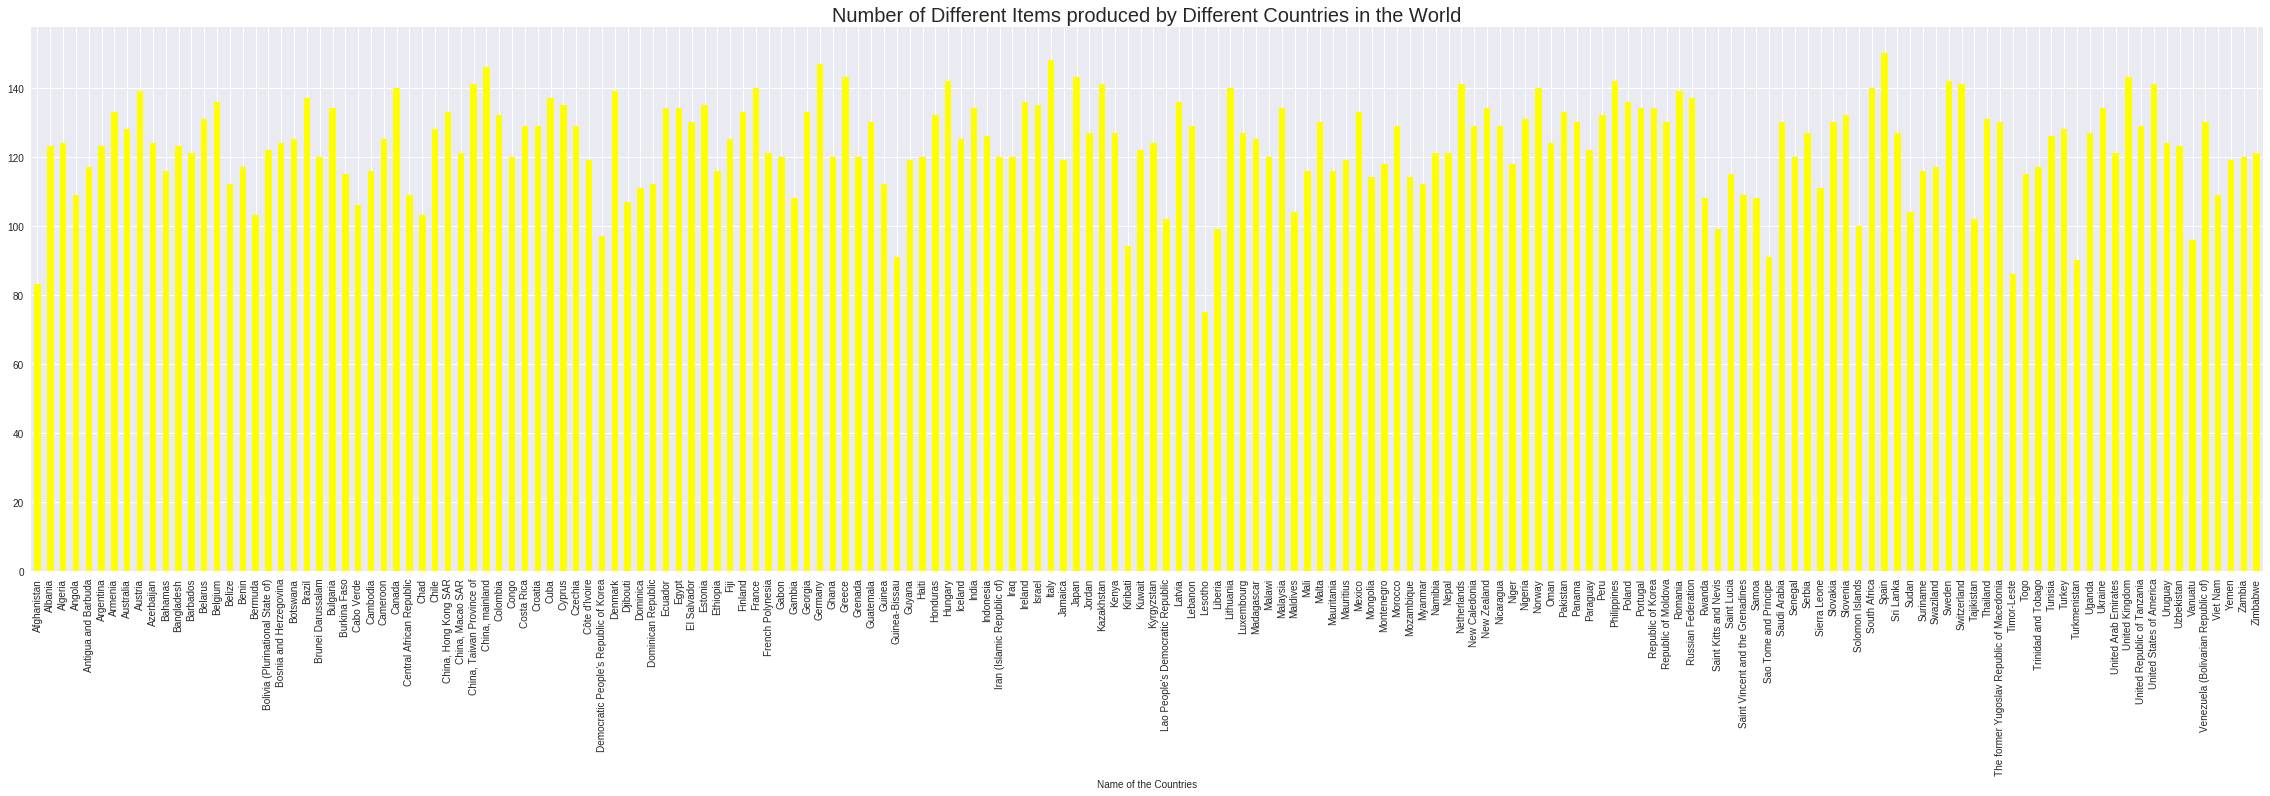

In [0]:
data['Area'].value_counts().sort_index().plot.bar(figsize = (40, 10), color = 'yellow')
plt.title('Number of Different Items produced by Different Countries in the World', fontsize = 20)
plt.xlabel('Name of the Countries', fontsize = 10)
plt.show()

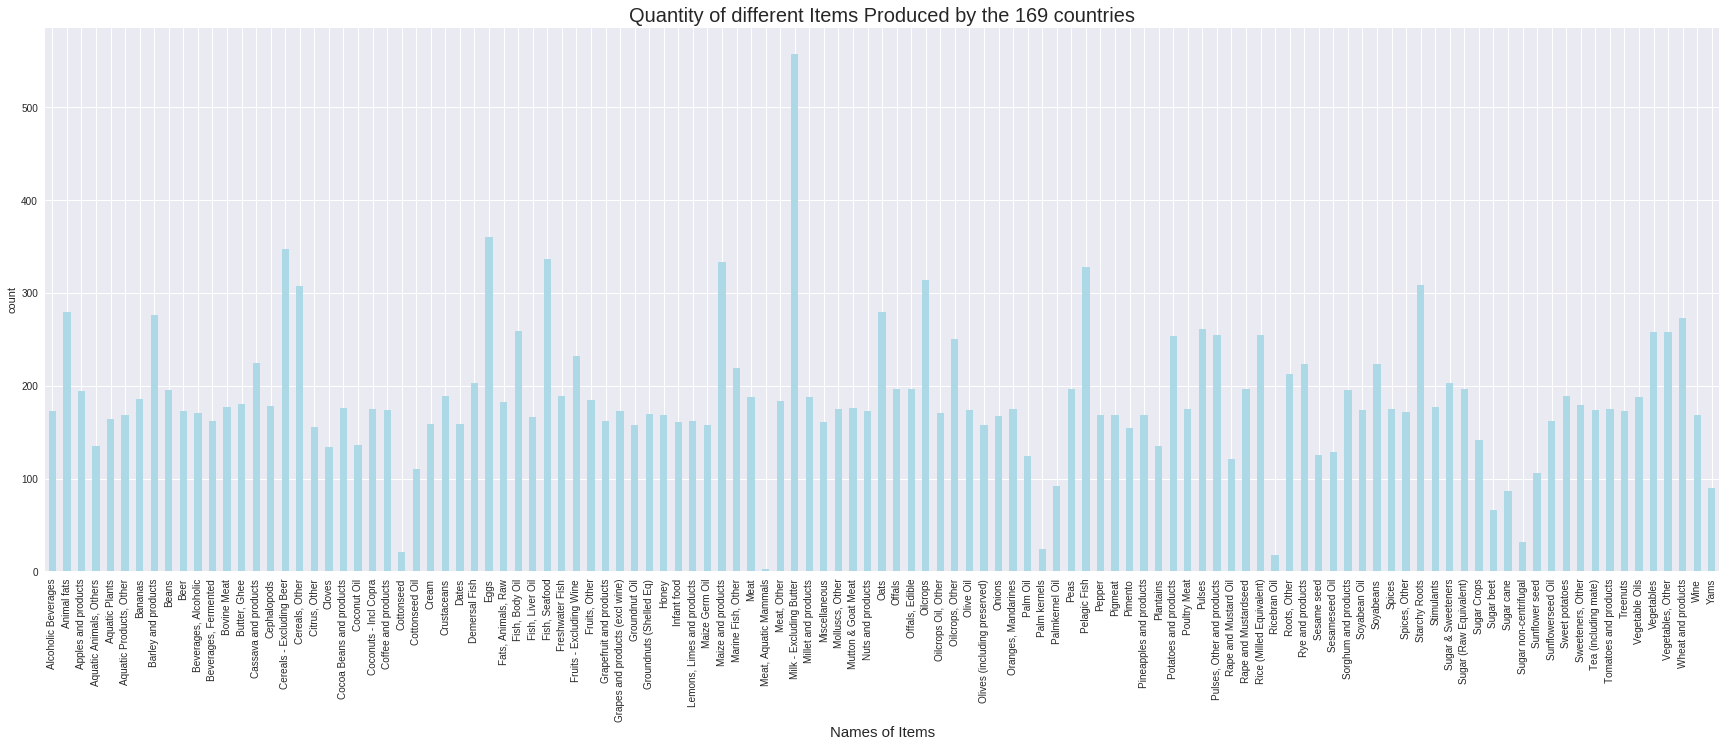

In [0]:
data['Item'].value_counts().sort_index().plot.bar(figsize = (30, 10), color = 'lightblue')
plt.title('Quantity of different Items Produced by the 169 countries', fontsize = 20)
plt.xlabel('Names of Items', fontsize = 15)
plt.ylabel('count')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


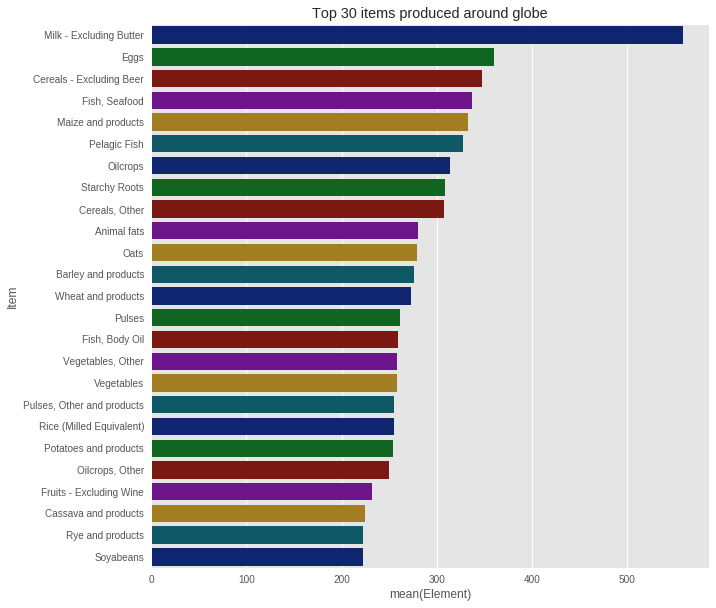

In [0]:
# Top Products around the globe

# setting the style to be ggplot
plt.style.use("ggplot")


items = pd.DataFrame(data.groupby("Item")["Element"].agg("count").sort_values(ascending=False))[:25]

# plotting
plt.rcParams['figure.figsize'] = (10, 10)
#plt.gcf().subplots_adjust(left = .3)
sns.barplot(x = items.Element, y = items.index, data = items, palette = 'dark')
plt.gca().set_title("Top 30 items produced around globe")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


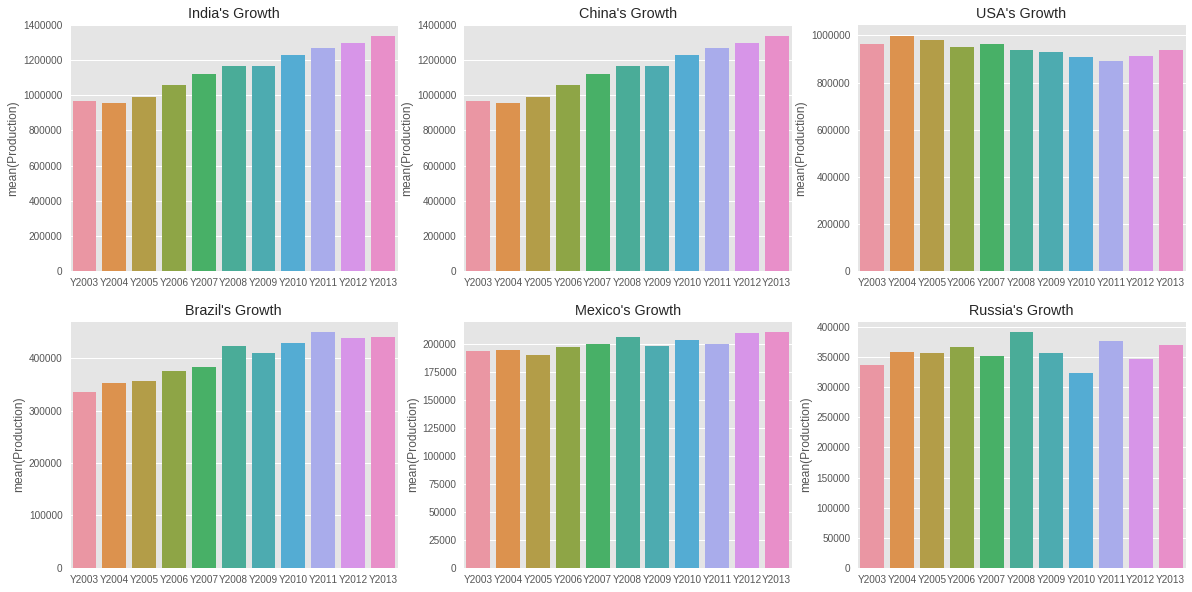

In [0]:
# setting the size of the plot
plt.rcParams['figure.figsize'] = (20, 10)


# looking at India's Growth
india_production = pd.DataFrame(data[data['Area'] == 'India'].loc[:, "Y2003": "Y2013"].agg("sum", axis = 0))

india_production.columns = ['Production']
plt.subplot(231)
sns.barplot(x = india_production.index, y = india_production.Production, data = india_production)
plt.gca().set_title("India's Growth")

# looking at china's growth
china_production = pd.DataFrame(data[data['Area'] == 'China, mainland'].loc[:, "Y2003":"Y2013"].agg("sum", axis = 0))

china_production.columns = ['Production']
plt.subplot(232)
sns.barplot(x = china_production.index, y = india_production.Production, data = china_production)
plt.gca().set_title("China's Growth")

#looking at usa's growth
usa_production = pd.DataFrame(data[data['Area'] == 'United States of America'].loc[:,"Y2003":"Y2013"].agg("sum", axis = 0))

usa_production.columns = ['Production']
plt.subplot(233)
sns.barplot(x = usa_production.index, y = usa_production.Production, data = usa_production)
plt.gca().set_title("USA's Growth")

#looking at brazil's growth
brazil_production = pd.DataFrame(data[data['Area'] == 'Brazil'].loc[:,"Y2003":"Y2013"].agg("sum", axis = 0))

brazil_production.columns = ['Production']
plt.subplot(234)
sns.barplot(x = brazil_production.index, y = brazil_production.Production, data = brazil_production)
plt.gca().set_title("Brazil's Growth")


#looking at mexico's growth
mexico_production = pd.DataFrame(data[data['Area'] == 'Mexico'].loc[:,"Y2003":"Y2013"].agg("sum", axis = 0))

mexico_production.columns = ['Production']
plt.subplot(235)
sns.barplot(x = mexico_production.index, y = mexico_production.Production, data = mexico_production)
plt.gca().set_title("Mexico's Growth")

#looking at russia's growth
russia_production = pd.DataFrame(data[data['Area'] == 'Russian Federation'].loc[:,"Y2003":"Y2013"].agg("sum", axis = 0))

russia_production.columns = ['Production']
plt.subplot(236)
sns.barplot(x = russia_production.index, y = russia_production.Production, data = russia_production)
plt.gca().set_title("Russia's Growth")

plt.show()

In [0]:
data['Element'].value_counts().sort_index()

Feed     3949
Food    17528
Name: Element, dtype: int64

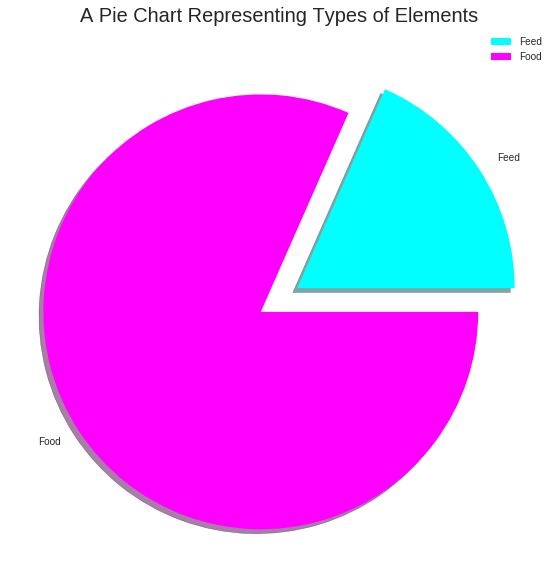

In [0]:
labels = ['Feed', 'Food']
size = [3949, 17528]
colors = ['cyan', 'magenta']
explode = [0.1, 0.1]

plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True)
plt.axis('off')
plt.title('A Pie Chart Representing Types of Elements', fontsize = 20)
plt.legend()
plt.show()

In [0]:
data['Unit'].value_counts().sort_index()

1000 tonnes    21477
Name: Unit, dtype: int64

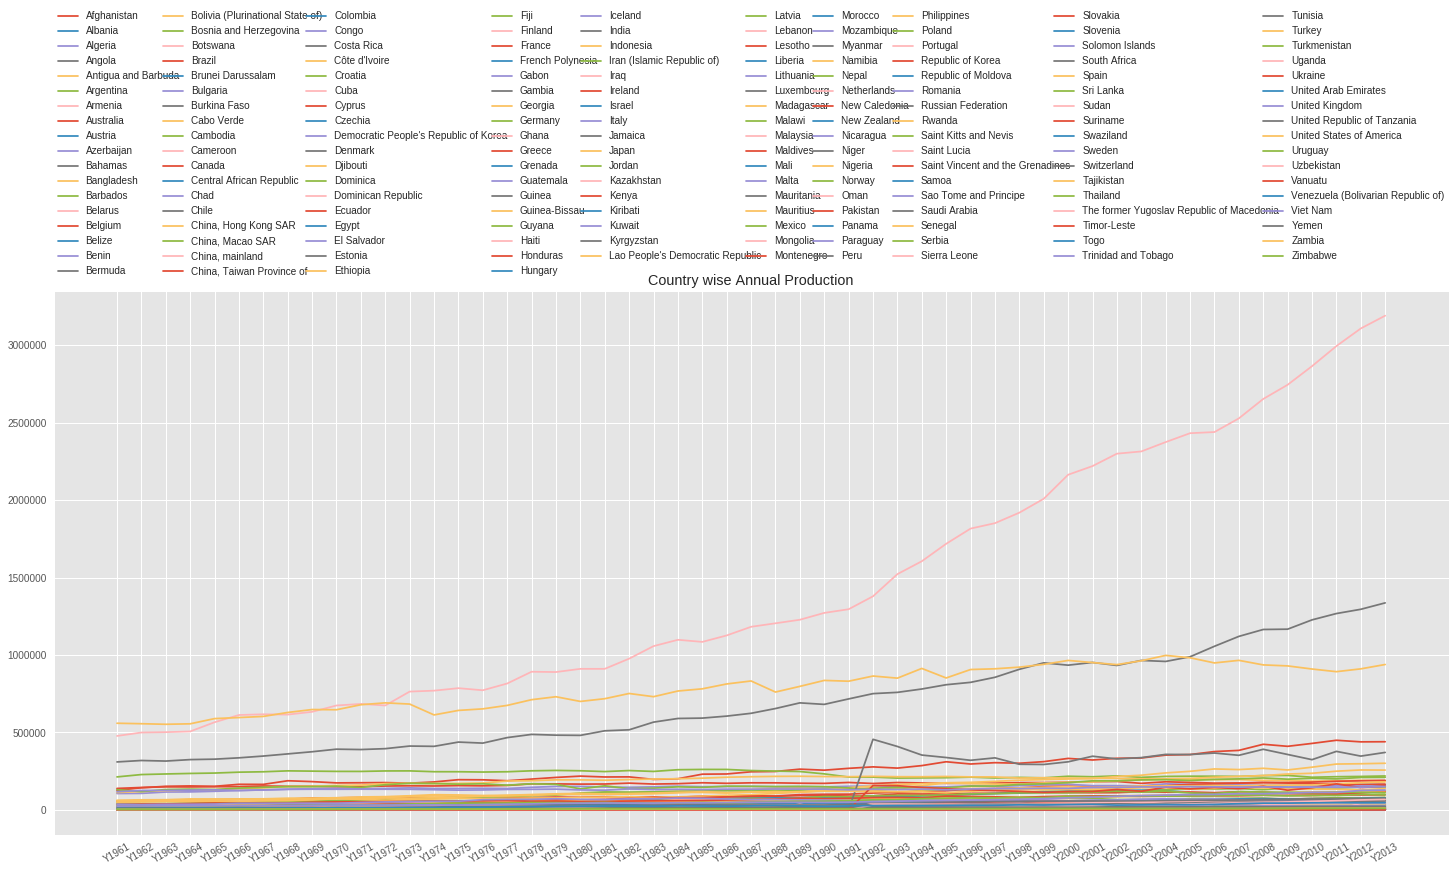

In [0]:
# plotting for the Annual Production of crops by every country

countries = list(data['Area'].unique())
years = list(data.iloc[:, 10:].columns)

plt.figure(figsize = (25, 10))
for i in countries:
  production = []
  for j in years:
    production.append(data[j][data['Area'] == i].sum())
  plt.plot(production, label = i)
  
plt.xticks(np.arange(53), tuple(years), rotation = 30)
plt.title('Country wise Annual Production')
plt.legend(bbox_to_anchor = (0., 1.02, 1.,  .102), loc = 3, ncol = 10, mode = 'expand', borderaxespad = 0.)
plt.savefig('p.png')
plt.show()

In [0]:
# creating a new data containing information about countries and productions only

new_data_dict = {}
for i in countries:
  production = []
  for j in years:
    production.append(data[j][data['Area'] == i].sum())
  new_data_dict[i] = production
new_data = pd.DataFrame(new_data_dict)

new_data.head()

,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,...,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe
0,9481.0,1706.0,7488.0,4834.0,92.0,43402.0,0.0,25795.0,22542.0,0.0,...,12367.0,559347.0,4631.0,0.0,97.0,9523.0,23856.0,2982.0,2976.0,3260.0
1,9414.0,1749.0,7235.0,4775.0,94.0,40784.0,0.0,27618.0,22627.0,0.0,...,12810.0,556319.0,4448.0,0.0,101.0,9369.0,25220.0,3038.0,3057.0,3503.0
2,9194.0,1767.0,6861.0,5240.0,105.0,40219.0,0.0,28902.0,23637.0,0.0,...,13109.0,552630.0,4682.0,0.0,103.0,9788.0,26053.0,3147.0,3069.0,3479.0
3,10170.0,1889.0,7255.0,5286.0,95.0,41638.0,0.0,29107.0,24099.0,0.0,...,12965.0,555677.0,4723.0,0.0,102.0,10539.0,26377.0,3224.0,3121.0,3738.0
4,10473.0,1884.0,7509.0,5527.0,84.0,44936.0,0.0,28961.0,22664.0,0.0,...,13742.0,589288.0,4581.0,0.0,107.0,10641.0,26961.0,3328.0,3236.0,3940.0


In [0]:
# making the transpose of the new data and assigning year names to them

new_data = pd.DataFrame.transpose(new_data)
new_data.columns = years

new_data.head()

,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,Y1970,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
Afghanistan,9481.0,9414.0,9194.0,10170.0,10473.0,10169.0,11289.0,11508.0,11815.0,10454.0,...,16542.0,17658.0,18317.0,19248.0,19381.0,20661.0,21030.0,21100.0,22706.0,23007.0
Albania,1706.0,1749.0,1767.0,1889.0,1884.0,1995.0,2046.0,2169.0,2230.0,2395.0,...,6637.0,6719.0,6911.0,6744.0,7168.0,7316.0,7907.0,8114.0,8221.0,8271.0
Algeria,7488.0,7235.0,6861.0,7255.0,7509.0,7536.0,7986.0,8839.0,9003.0,9355.0,...,48619.0,49562.0,51067.0,49933.0,50916.0,57505.0,60071.0,65852.0,69365.0,72161.0
Angola,4834.0,4775.0,5240.0,5286.0,5527.0,5677.0,5833.0,5685.0,6219.0,6460.0,...,25541.0,26696.0,28247.0,29877.0,32053.0,36985.0,38400.0,40573.0,38064.0,48639.0
Antigua and Barbuda,92.0,94.0,105.0,95.0,84.0,73.0,64.0,59.0,68.0,77.0,...,92.0,115.0,110.0,122.0,115.0,114.0,115.0,118.0,113.0,119.0


In [0]:
new_data.shape

(174, 53)

In [0]:
# feature engineering

# defining a new column to view the mean production country wise
mean_production = []
for  i  in range(174):
  mean_production.append(new_data.iloc[i,:].values.mean())
new_data['Mean Production'] = mean_production

# defining Rank according to mean productions
new_data['Rank'] = new_data['Mean Production'].rank(ascending = False)

In [0]:
new_data.sample(5)

,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,Y1970,...,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Mean Production,Rank
Saint Vincent and the Grenadines,75.0,75.0,77.0,77.0,79.0,83.0,78.0,82.0,91.0,98.0,...,205.0,215.0,219.0,230.0,228.0,213.0,217.0,221.0,126.698113,169.0
Mozambique,7759.0,8032.0,7907.0,8186.0,8337.0,8405.0,8640.0,8567.0,8956.0,9121.0,...,20275.0,20383.0,22103.0,23349.0,25687.0,26576.0,28115.0,28517.0,13798.415094,67.0
Sudan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,42543.0,43661.0,1626.490566,133.0
Algeria,7488.0,7235.0,6861.0,7255.0,7509.0,7536.0,7986.0,8839.0,9003.0,9355.0,...,51067.0,49933.0,50916.0,57505.0,60071.0,65852.0,69365.0,72161.0,28879.490566,38.0
Uruguay,4631.0,4448.0,4682.0,4723.0,4581.0,4610.0,4327.0,4258.0,4710.0,4876.0,...,6149.0,6957.0,7051.0,7511.0,6879.0,7582.0,7947.0,7792.0,5472.924528,95.0


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


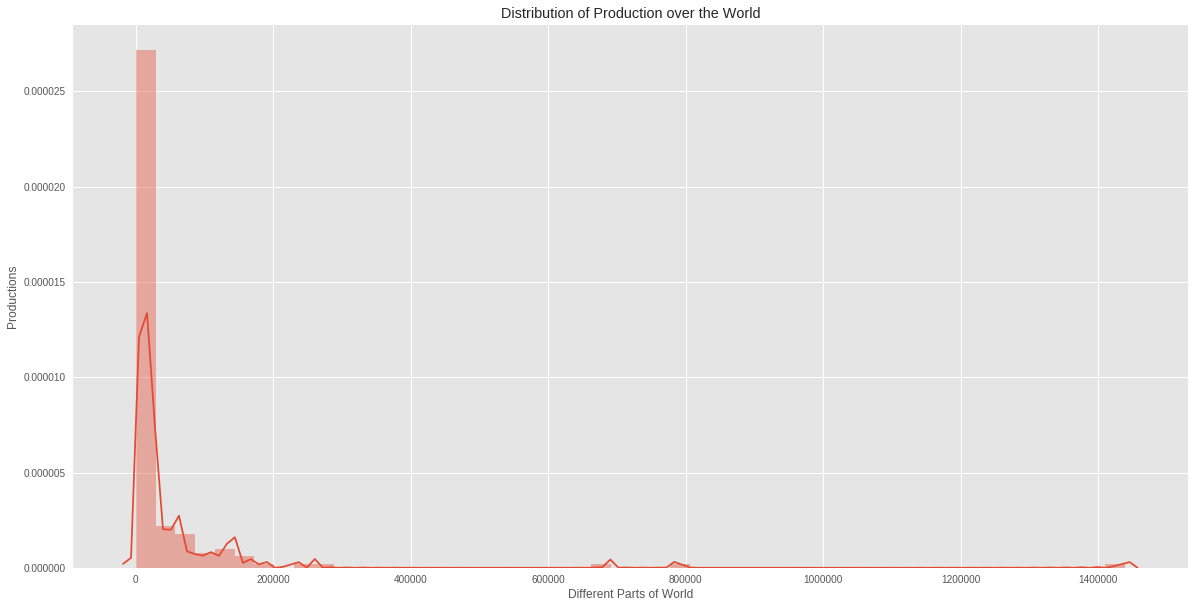

In [0]:
# checking out the distribution plot for the Mean Productions

sns.distplot(new_data['Mean Production'])
plt.title('Distribution of Production over the World')
plt.xlabel('Different Parts of World')
plt.ylabel('Productions')
plt.show()

In [0]:
# checking the shape of transposed dataset

new_data.shape

(174, 55)

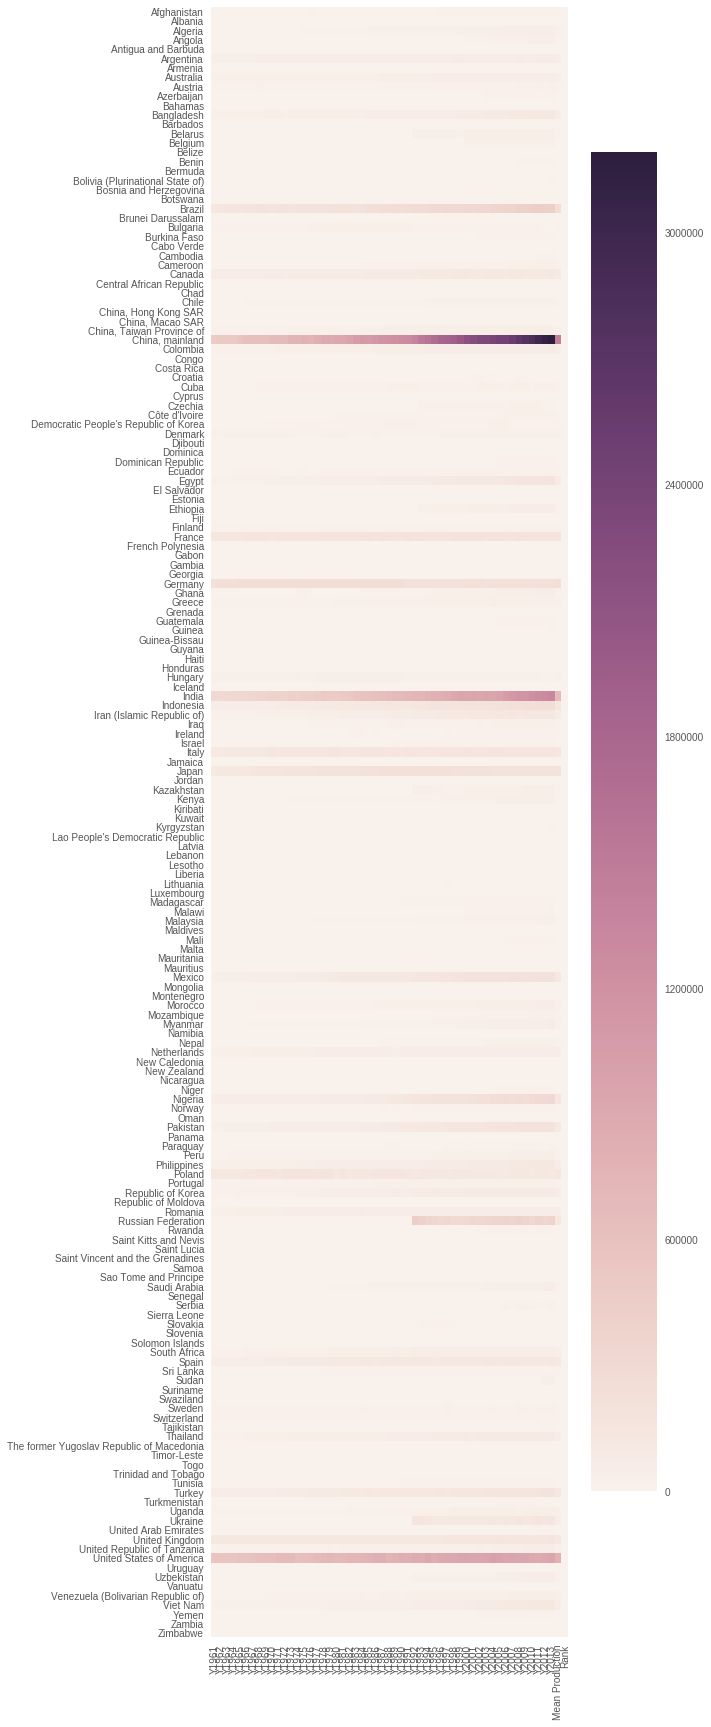

In [0]:

#heatmap
plt.rcParams['figure.figsize'] = (8, 30)
sns.heatmap(new_data)

From the above graph we can see that the top producers are India, China, USA, Russia, and Brazil

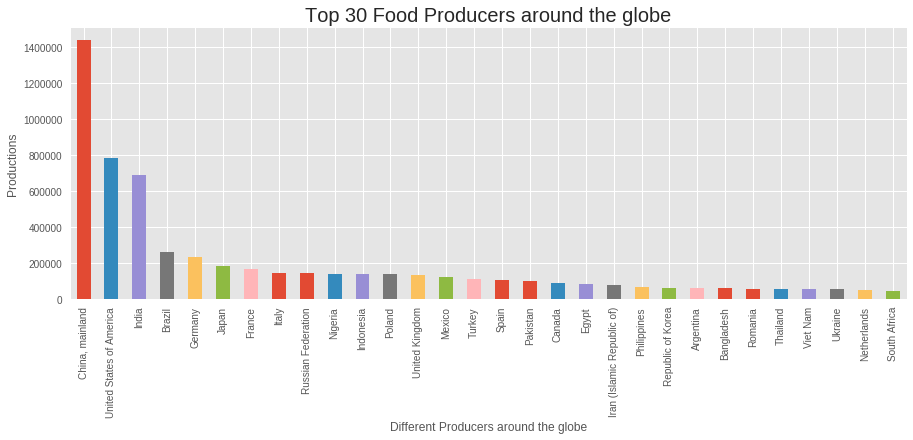

In [0]:
# countries Producing maximum food

max_prod = new_data['Mean Production'].sort_values(ascending = False).head(30).plot.bar()

plt.rcParams['figure.figsize'] = (15, 5)
plt.title("Top 30 Food Producers around the globe", fontsize = 20)
plt.xlabel('Different Producers around the globe')
plt.ylabel('Productions')
plt.show()

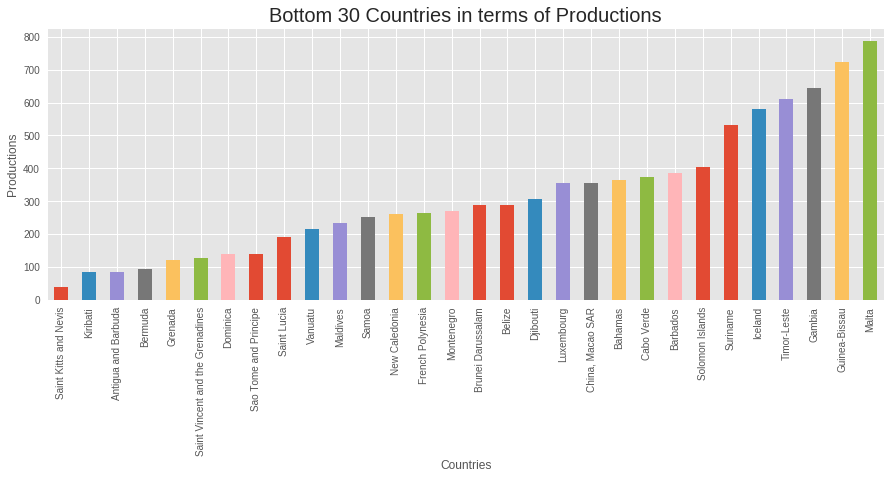

In [0]:
# contries producing least food

min_prod = new_data['Mean Production'].sort_values().head(30).plot.bar()

plt.rcParams['figure.figsize'] = (15, 5)
plt.title("Bottom 30 Countries in terms of Productions", fontsize = 20)
plt.xlabel('Countries')
plt.ylabel('Productions')
plt.show()

In [0]:
# clustering of mean production and rank of the countries

# making a 2d dataset containg attributes which are to be clustered accordingly

x = new_data.iloc[:,[53, 54]].values

# checking the shape of x
x.shape

(174, 2)

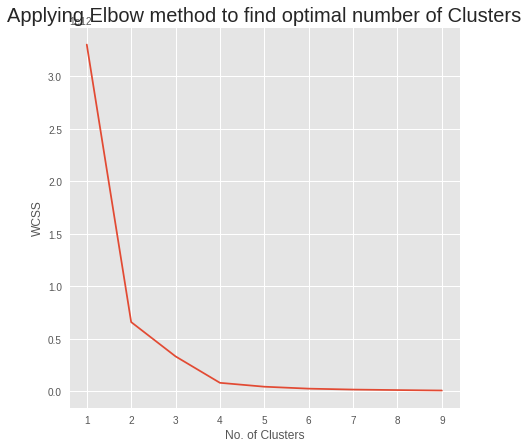

In [0]:
# applying elbow method to find the optimal number of clusters

from sklearn.cluster import KMeans

wcss = []
for i in range(1, 10):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

# plotting the results
plt.rcParams['figure.figsize'] = (7, 7)
plt.plot(range(1, 10), wcss)
plt.title('Applying Elbow method to find optimal number of Clusters', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

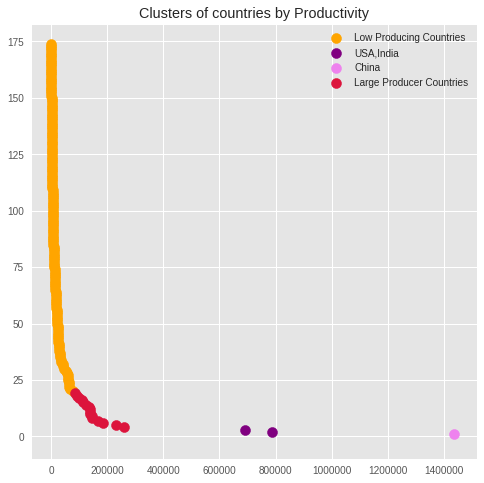

In [0]:

# clustering
# using K-Means Algorithm


kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0) 
y_kmeans = kmeans.fit_predict(x)

plt.rcParams['figure.figsize'] = (8, 8)

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'orange', label = 'Low Producing Countries')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'purple', label = 'USA,India')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'violet', label = 'China')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'crimson', label = 'Large Producer Countries')

plt.title('Clusters of countries by Productivity')
plt.legend()
plt.show()


In [0]:
data['Item'].head()

0          Wheat and products
1    Rice (Milled Equivalent)
2         Barley and products
3         Barley and products
4          Maize and products
Name: Item, dtype: object

In [0]:


# checking the number of unique elements in both the attributes
print("Unique Elements present in Items: ", data['Item'].value_counts().nunique)
print("Unique Elements present in Areas :", data['Area'].value_counts().nunique)

Unique Elements present in Items:  <bound method IndexOpsMixin.nunique of Milk - Excluding Butter         558
Eggs                            360
Cereals - Excluding Beer        347
Fish, Seafood                   337
Maize and products              333
Pelagic Fish                    328
Oilcrops                        314
Starchy Roots                   309
Cereals, Other                  308
Animal fats                     280
Oats                            279
Barley and products             276
Wheat and products              273
Pulses                          261
Fish, Body Oil                  259
Vegetables                      258
Vegetables, Other               258
Rice (Milled Equivalent)        255
Pulses, Other and products      255
Potatoes and products           254
Oilcrops, Other                 250
Fruits - Excluding Wine         232
Cassava and products            225
Rye and products                223
Soyabeans                       223
Marine Fish, Other        